In [19]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as st
import sys
sys.path.append("..") 
import importlib
import functions.calc_mcf as cm

importlib.reload(cm)


dpi = 400

plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee'])
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams["text.usetex"] = False

In [20]:
def readData(file):
    with h5py.File(file, 'r') as data:
        myData = {key: data[key][()] for key in data.keys()}
    return myData


fileNames = ["../../h5/half_scale_restart/g1041_9015_data_in_contour_new_contour_32.h5", "../../h5/half_scale_restart/g1041_9015_data_in_contour_checkingVersion.h5",
             "../../h5/half_scale_restart/g1040_0016_data_in_contour_new_contour_32.h5", "../../h5/half_scale_restart/g1040_0016_data_in_contour_checkingVersion.h5"] 
  

datas = [readData(fileName) for fileName in fileNames]

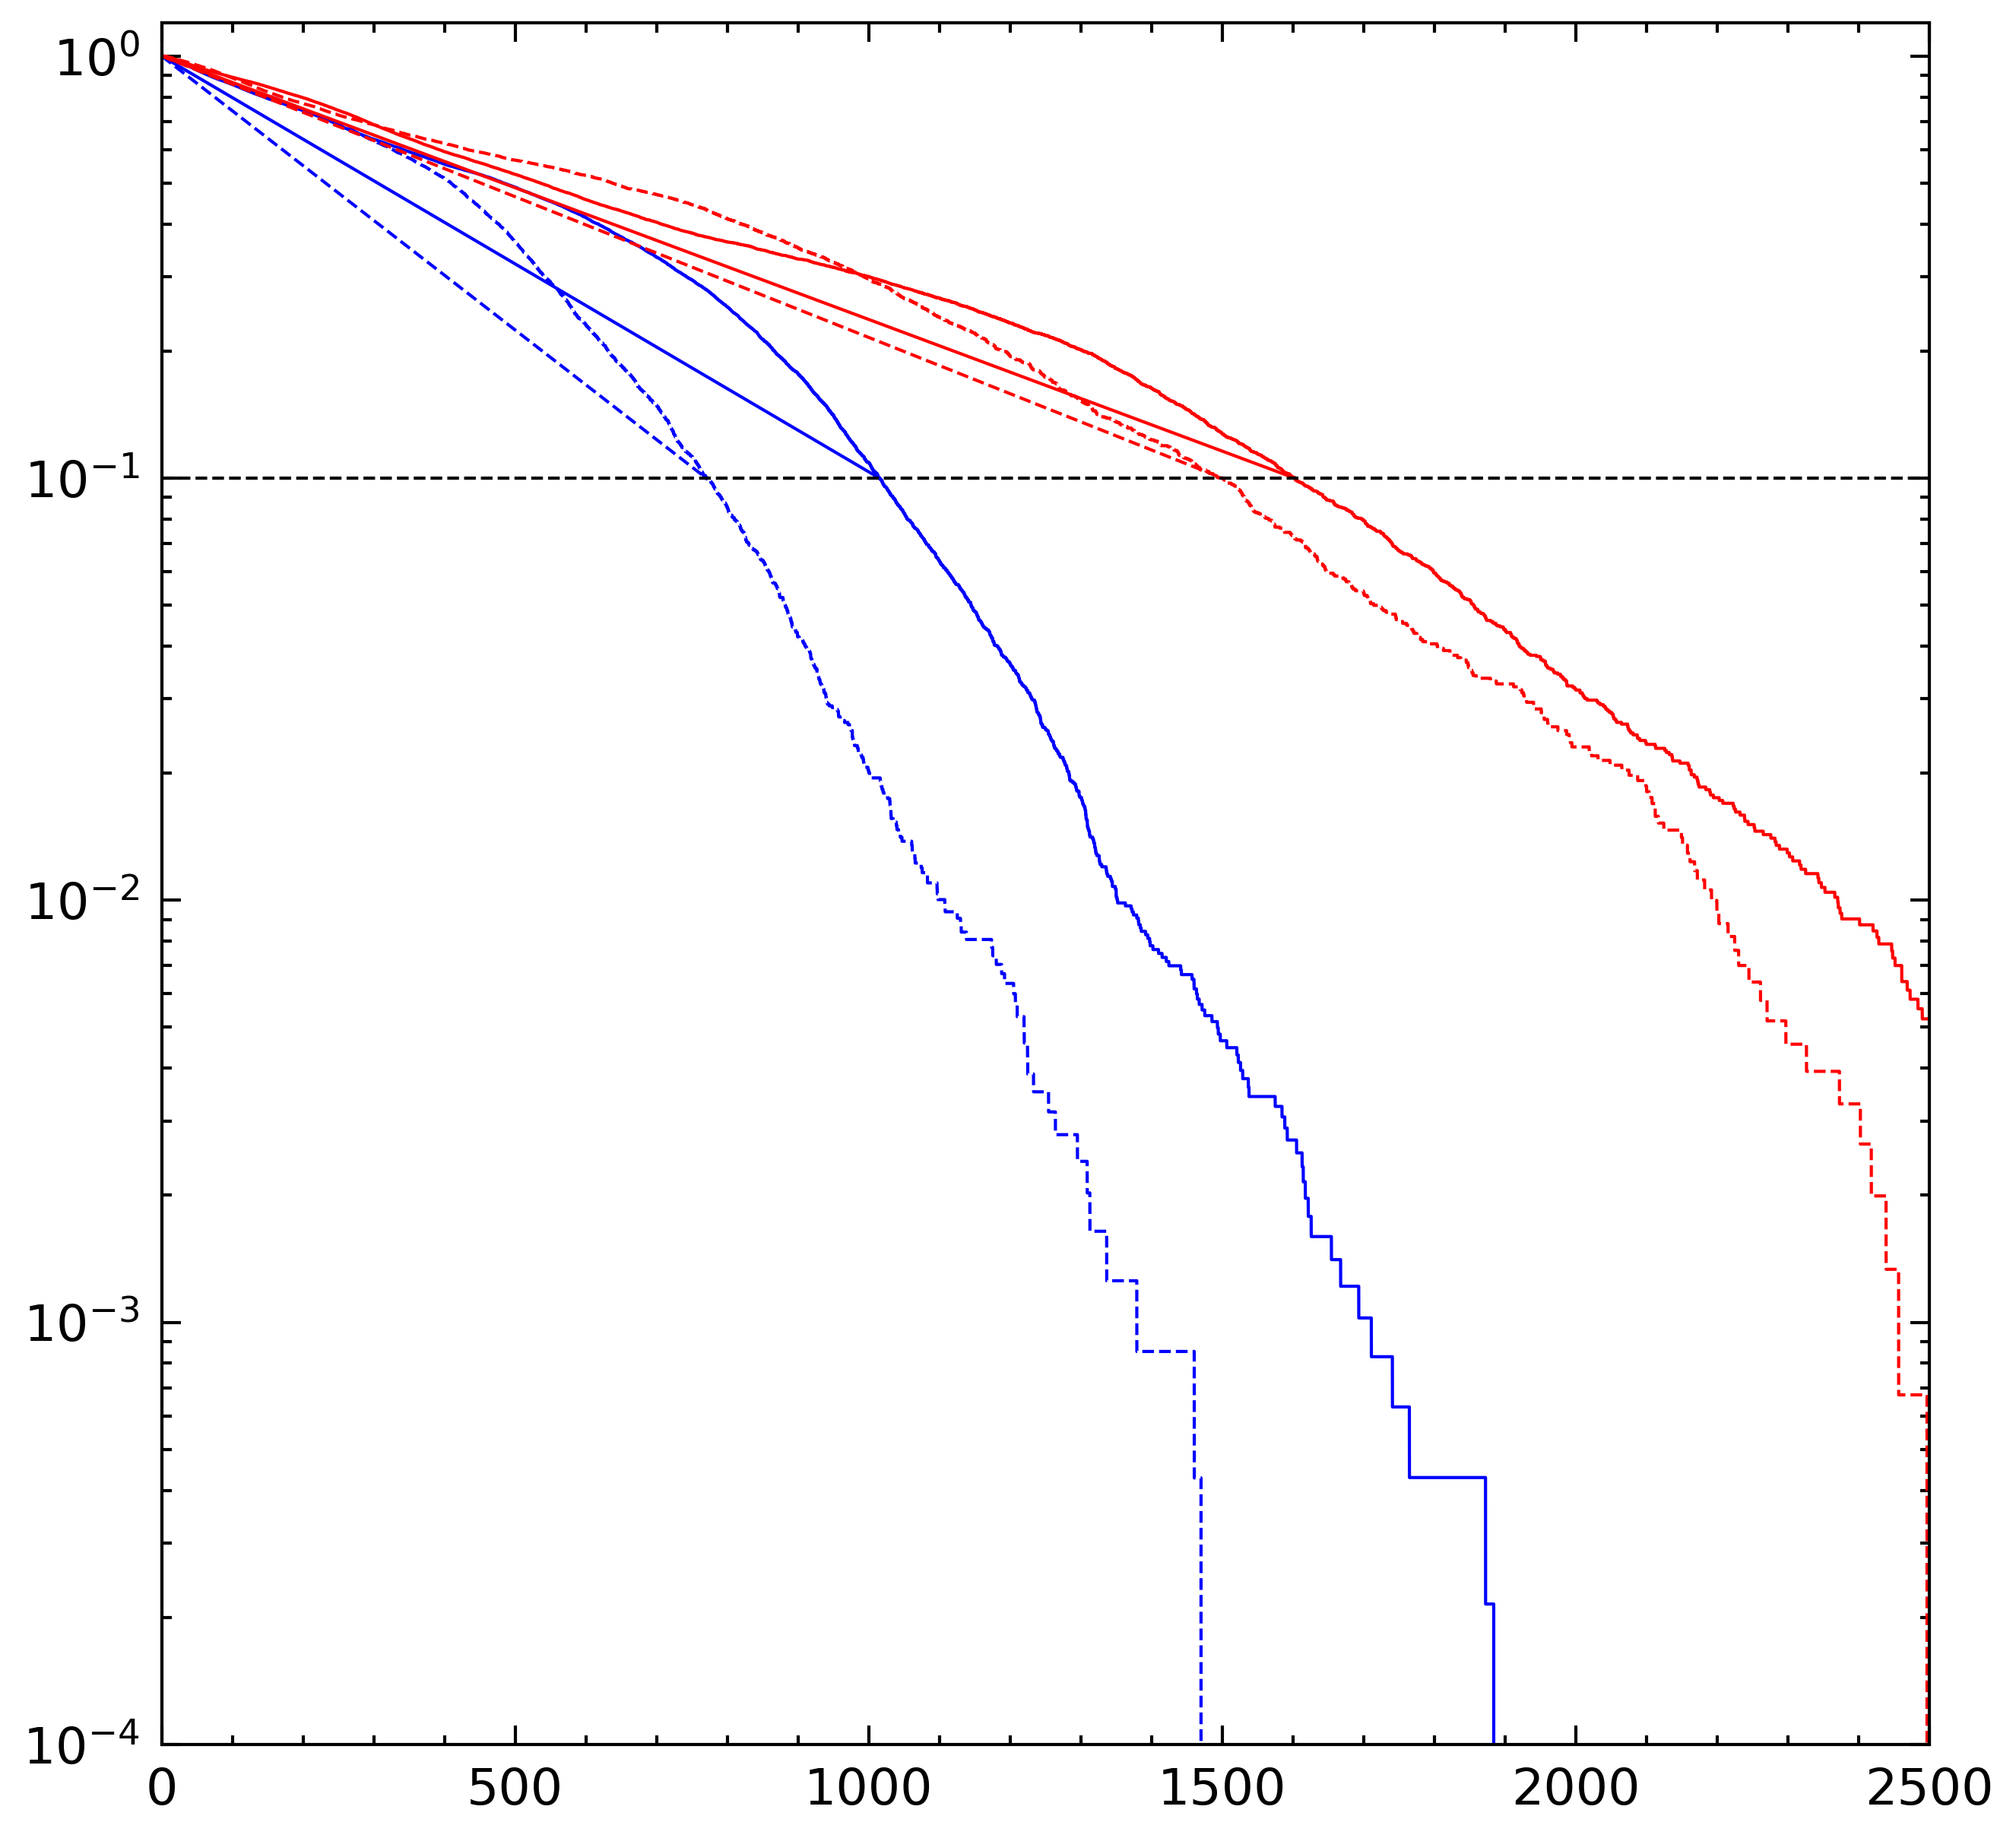

In [23]:
colors = ['blue']*2 + ['red']*2
lss = ['solid', 'dashed', 'solid', 'dashed']

for i, data in enumerate(datas):


    # The 3d data needs to be projected to calculate mcf
    binX = np.linspace(-10, 10, 961)
    binY = binX.copy()

    dx = 10/480

    den_binned = st.binned_statistic_2d(
        data['x'], data['y'], data['density'], statistic="sum", bins=[binX, binY])[0]*dx

    den_points = den_binned[den_binned > 0]


    # default bin used by the current code
    bins = np.linspace(0, 150000, int(10e5)+1) * dx
    
    # calculate the mcf, mcf slope and mcf area.
    mcf, mcf_bins = cm.calc_mcf(den_points, bins, 0, dx)
    mcf_slope, mcf_area, den10 = cm.calc_mcf_slope_and_area(mcf, mcf_bins)
    
    # plot the mcf
    plt.plot(mcf_bins, mcf, ls=lss[i], color=colors[i], lw=0.5)
    # plot the lines define mcf slope
    plt.plot([np.min(mcf_bins[mcf > 0]), 1/mcf_slope-np.min(mcf_bins[mcf > 0])],
             [1, 0.1], ls=lss[i], color=colors[i], lw=0.5)

plt.yscale('log')
plt.ylim(1e-4, 1.2)
plt.hlines(0.1, 0, 2500, ls='dashed', lw=0.5)
plt.xlim(0, 2500)
plt.show()
